## 5 Modelling

### 5.1 Table of Contents<a id='5.1_Contents'></a>
* [5.1 Table of Contents](#5.1_Table_Contents)  
* [5.2 Introduction](5.2_Intro)
* [5.3 Libraries that will be used](#5.3_Libraries_that_will_be_used)
* [5.4 Loading the data](#5.4_Loading_the_data)
* [5.5 Logistic Regression Classifier](#5.5_logisticregression)
    * [5.5.1 Logistic Regression with GridSearchCV](#5.5.1_logisticregressionGS) 
    * [5.5.2 Logistic Regression Table](#5.5.2_logisticregressionTB)
* [5.6 Random Forest Classifier ](#5.6_randomforest) 
    * [5.6.1 Random Forest with GridSearchCV](#5.6.1_RandomForestwGS)
    * [5.6.2 Random Forest Table](#5.6.2_RFTB)
* [5.7 Light GBM Classifier](#5.7_lgbm) 
    * [5.7.1 LGBM with GridSearchCV](#5.7.1_LGBMGS)
    * [5.7.2 LGBM Table](#5.7.2_LGBMTB)
* [5.8 xgBoost Classifier](#5.8_xgboost) 
    * [5.8.1 xgBoost with GridSearchCV](#5.8.1_xgBoostGS)
    * [5.8.2 Random Forest Table](#5.8.2_xgBoostTB)
* [5.9 Decision Tree](#5.9_Decision_Tree)
    * [5.9.1 Decision Tree with GridSearchCV](#5.9.1_DtreeGS)
    * [5.9.2 Random Forest Table](#5.9.2_DTreeTB)
    
    ### Summary Values  <a id='5.5 '></a>




### 5.2 Introduction

  
* Logistic Regression Classifier
* Random Forest Classifier 
* Light GBM Classifier
* xgBoost Classifier
* Decision Tree

### 5.3 Libraries that will be used<a id='5.3_Libraries_that_will_be_used'></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import plotly.graph_objs as go
import plotly.offline as py
import pickle

# For Data Preprocessing
from sklearn.model_selection import train_test_split

# For Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Evaluation
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_roc_curve, auc
#from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings("ignore")

/Users/aquinojoeanson/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



### 5.4 Loading Data <a id='5.4_Loading_the_data'></a>

In [2]:
# Load Data
df = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/Cleveland_Model.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2, stratify=y)


### 5.5 Logistic Regression model  <a id='5.5_logisticregression'></a>

In [3]:
# Build and fit Logistic Regression model
logreg = LogisticRegression()
logreg = logreg.fit(Xlr, ylr)

In [4]:
def get_model_accuracy(model, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    logreg_accuracy= logreg.score(Xtestlr, ytestlr)
    return logreg_accuracy

In [5]:
# Accuracy in Logistic Regression model
logreg_accuracy = get_model_accuracy(logreg, Xtestlr, ytestlr)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4}')
print()

# Predict class for X_test
y_predict_logreg = logreg.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(logreg,open(newfilename_pickle,'wb'))

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = logreg.predict(Xlr)

# Classification Report of logistic regression model
print(classification_report(y_predict_logreg, ytestlr))

Logistic Regression Accuracy: 0.96

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.91      0.95        32

    accuracy                           0.96        75
   macro avg       0.97      0.95      0.96        75
weighted avg       0.96      0.96      0.96        75



### 5.5.1 Logistic Regression with GridSearchCV <a id='5.5.1_logisticregressionGS'></a>

In [6]:
def get_best_parameters_GridSearchCV(logreg, params, Xlr, ylr):
    logreg = GridSearchCV(logreg, params, cv=5)
    logreg.fit(Xlr, ylr)
    
    best_params = logreg.best_params_
    print(f'Best Parameters in {logreg}: {best_params}')
    print()
    
    best_estimator = logreg.best_estimator_
    return best_estimator

In [7]:
params_logreg = {'penalty': ['l1', 'l2', 'elasticnet'],
                 'C': np.logspace(-4, 4, 20),
                 'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [8]:
# Build and fit parameter tuned Logistic Regression model
logreg_gscv = get_best_parameters_GridSearchCV(logreg, params_logreg, Xlr, ylr) 
logreg_gscv = logreg_gscv.fit(Xlr, ylr)

# Accuracy test score for logreg_cv
logreg_gscv_accuracy = get_model_accuracy(logreg_gscv, Xtestlr, ytestlr)
print(f'Logistic Regression Model with GridSearchCV Accuracy: {logreg_gscv_accuracy:.4}')
print()

# Make prediction on test dataset
y_predict_logreg_gscv = logreg_gscv.predict(Xtestlr)

# Classification Report of logreg_cv
print(classification_report(y_predict_logreg_gscv, ytestlr))

Best Parameters in GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']}): {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression Model with GridSearchCV Accuracy: 0.96

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro a

### 5.2.2 Logistic Regression Table  <a id='5.5.2_logisticregressionTB'></a>

In [9]:
# Training set performance
LR_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
LR_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
LR_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
LR_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
LR_test_accuracy = accuracy_score(ytestlr, y_predict_logreg) # Calculate Accuracy
LR_test_precision = precision_score(ytestlr, y_predict_logreg) # Calculate Precision
LR_test_recall = recall_score(ytestlr, y_predict_logreg) # Calculate Recall
LR_test_f1 = f1_score(ytestlr, y_predict_logreg, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'Logistic_Regression': LR_train_accuracy}
precision_train_list = {'Logistic_Regression': LR_train_precision}
recall_train_list = {'Logistic_Regression': LR_train_recall}
f1score_train_list = {'Logistic_Regression': LR_train_f1}


#Test Results
accuracy_test_list = {'Logistic_Regression': LR_test_accuracy}
precision_test_list = {'Logistic_Regression': LR_test_precision}
recall_test_list = {'Logistic_Regression': LR_test_recall}
f1score_test_list = {'Logistic_Regression': LR_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])
LR_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)                 
LR_df



,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
Logistic_Regression,0.995495,0.96,0.988506,0.90625,1.0,1.0,0.9955,0.960309


### 5.6 Random Forest  <a id='5.6_randomforest'></a>

In [10]:
# Build and fit Random Forest model
ranfor = RandomForestClassifier()
ranfor = ranfor.fit(Xlr, ylr)

# Accuracy score for Random Forest
ranfor_accuracy = get_model_accuracy(ranfor, Xtestlr, ytestlr)
print(f'RandomForestClassifier Accuracy: {ranfor_accuracy:.4}')
print()

# Predict class for X_test
y_predict_ranfor = ranfor.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(ranfor,open(newfilename_pickle,'wb'))

ranfor_cm_test = confusion_matrix(y_predict_ranfor, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = ranfor.predict(Xlr)

# Classification Report of Random Forest model
print(classification_report(y_predict_ranfor, ytestlr))

RandomForestClassifier Accuracy: 0.96

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.97      0.98        30

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.99        75
weighted avg       0.99      0.99      0.99        75



### 5.6.1 Rondom Forest with GridSearchCV  <a id='5.6.1_RandomForestwGS'></a>

In [11]:
def get_best_parameters_GridSearchCV(ranfor, params, Xlr, ylr):
    ranfor = GridSearchCV(ranfor, params, cv=5)
    ranfor.fit(Xlr, ylr)
    
    best_params = ranfor.best_params_
    print(f'Best Parameters in {ranfor}: {best_params}')
    print()
    
    best_estimator = ranfor.best_estimator_
    return best_estimator

In [12]:
params_rf = {'max_depth': [2, 3, 4, 5],
               'max_features': ['auto', 'sqrt', 'log2'],
               'n_estimators':[0, 10, 50],
               'random_state': [0, 10, 42]}

In [13]:
# Build and fit Random Forest model with the best hyperparameters
ranfor_gscv = get_best_parameters_GridSearchCV(ranfor, params_rf, Xlr, ylr)
ranfor_gscv = ranfor_gscv.fit(Xlr, ylr)

# Accuracy score for rf_gscv
ranfor_gscv_accuracy = get_model_accuracy(ranfor_gscv, Xtestlr, ytestlr)
print(f'Random Forest with GridSearchCV Accuracy: {ranfor_gscv_accuracy:.4}')
print()

# Make prediction on test dataset
y_predict_ranfor_gscv = ranfor_gscv.predict(Xtestlr)

# Classification Report of grid_rf_model
print(classification_report(y_predict_ranfor_gscv, ytestlr))


Best Parameters in GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 10, 50],
                         'random_state': [0, 10, 42]}): {'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50, 'random_state': 42}

Random Forest with GridSearchCV Accuracy: 0.96

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.97      1.00      0.98        28

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



### 5.6.2 Random Forest Table  <a id='5.6.2_RFTB'></a>

In [14]:
# Training set performance
RF_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
RF_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
RF_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
RF_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
RF_test_accuracy = accuracy_score(ytestlr, y_predict_ranfor) # Calculate Accuracy
RF_test_precision = precision_score(ytestlr, y_predict_ranfor) # Calculate Precision
RF_test_recall = recall_score(ytestlr, y_predict_ranfor) # Calculate Recall
RF_test_f1 = f1_score(ytestlr, y_predict_ranfor, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'Random_Forest': RF_train_accuracy}
precision_train_list = {'Random_Forest': RF_train_precision}
recall_train_list = {'Random_Forest': RF_train_recall}
f1score_train_list = {'Random_Forest': RF_train_f1}


#Test Results
accuracy_test_list = {'Random_Forest': RF_test_accuracy}
precision_test_list = {'Random_Forest': RF_test_precision}
recall_test_list = {'Random_Forest': RF_test_recall}
f1score_test_list = {'Random_Forest': RF_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])
RF_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)                 
RF_df



,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
Random_Forest,1.0,0.986667,1.0,0.966667,1.0,1.0,1.0,0.986706


### 5.7 Light GBM  <a id='5.7_lgbm'></a>

In [15]:
import lightgbm as lgb

# Build and fit LightGBM model
LGB = lgb.LGBMClassifier()
LGB.fit(Xlr, ylr)

LGBMClassifier()

In [16]:
def get_model_accuracy(LGB, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    LGB_accuracy= LGB.score(Xtestlr, ytestlr)
    return LGB_accuracy

In [17]:
# Accuracy in LGBM model
LGB_accuracy = get_model_accuracy(LGB, Xtestlr, ytestlr)
print(f'LGBM Accuracy: {LGB_accuracy:.4}')
print()

# Predict class for X_test
y_predict_LGB = LGB.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(LGB,open(newfilename_pickle,'wb'))

LGB_cm_test = confusion_matrix(y_predict_LGB, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = LGB.predict(Xlr)

# Classification Report of logistic regression model
print(classification_report(y_predict_LGB, ytestlr))

LGBM Accuracy: 0.8667

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        44
           1       0.86      0.81      0.83        31

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



### 5.7.1 LGBM  with GridSearchCV <a id='5.7.1_LGBMGS'></a>

In [18]:
def get_best_parameters_GridSearchCV(LGB, params, Xlr, ylr):
    LGB = GridSearchCV(LGB, params, cv=5)
    LGB.fit(Xlr, ylr)
    
    best_params = LGB.best_params_
    print(f'Best Parameters in {LGB}: {best_params}')
    print()
    
    best_estimator = LGB.best_estimator_
    return best_estimator

In [19]:
params_LGB = {'learning_rate': [0.1, 0.01],
        'n_estimators': [50, 100, 150],
        'max_depth': [4, 6],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'subsample': [0.7, 0.8, 0.9],
        'min_child_samples': [1, 5, 10]}

In [20]:
# Build and fit Random Forest model with the best hyperparameters
LGB_gscv = get_best_parameters_GridSearchCV(LGB, params_LGB, Xlr, ylr)
LGB_gscv = LGB_gscv.fit(Xlr, ylr)

# Accuracy score for rf_gscv
LGB_gscv_accuracy = get_model_accuracy(LGB_gscv, Xtestlr, ytestlr)
print(f'LGBM with GridSearchCV Accuracy: {LGB_gscv_accuracy:.4}')
print()

# Make prediction on test dataset
y_predict_LGB_gscv = LGB_gscv.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(logreg,open(newfilename_pickle,'wb'))

LGB_cm_test = confusion_matrix(y_predict_LGB_gscv, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = LGB.predict(Xlr)

# Classification Report of grid_rf_model
print(classification_report(y_predict_LGB_gscv, ytestlr))

Best Parameters in GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.1, 0.01], 'max_depth': [4, 6],
                         'min_child_samples': [1, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]}): {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_samples': 1, 'n_estimators': 50, 'subsample': 0.7}

LGBM with GridSearchCV Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### 5.7.2 LGBM Table  <a id='5.7.2_LGBMTB'></a>

In [21]:
# Training set performance
LGB_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
LGB_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
LGB_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
LGB_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
LGB_test_accuracy = accuracy_score(ytestlr, y_predict_LGB) # Calculate Accuracy
LGB_test_precision = precision_score(ytestlr, y_predict_LGB) # Calculate Precision
LGB_test_recall = recall_score(ytestlr, y_predict_LGB) # Calculate Recall
LGB_test_f1 = f1_score(ytestlr, y_predict_LGB, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'LGBM': LR_train_accuracy}
precision_train_list = {'LGBM': LR_train_precision}
recall_train_list = {'LGBM': LR_train_recall}
f1score_train_list = {'LGBM': LR_train_f1}


#Test Results
accuracy_test_list = {'LGBM': LR_test_accuracy}
precision_test_list = {'LGBM': LR_test_precision}
recall_test_list = {'LGBM': LR_test_recall}
f1score_test_list = {'LGBM': LR_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])
LGB_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)                 
LGB_df



,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
LGBM,0.995495,0.96,0.988506,0.90625,1.0,1.0,0.9955,0.960309


#### 5.8 XGBoost  <a id='5.8_xgboost'></a>

In [22]:
# Build and fit XGBoost model
xgboost = XGBClassifier(eval_metric='error')
xgboost = xgboost.fit(Xlr, ylr)

# Accuracy score for xgb_model
xgboost_accuracy = get_model_accuracy(xgboost, Xtestlr, ytestlr)
print(f'XGBoost Classifier Accuracy: {xgboost_accuracy:.4}')
print()


# Predict class for X_test
y_predict_xgboost = xgboost.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(xgboost,open(newfilename_pickle,'wb'))

xgboost_cm_test = confusion_matrix(y_predict_xgboost, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = xgboost.predict(Xlr)

# Classification Report of xgb_model
print(classification_report(y_predict_xgboost, ytestlr))

XGBoost Classifier Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [23]:
def get_model_accuracy(xgboost, Xtestlr, ytestlr):
    """
    Return the mean accuracy of model on X_test and y_test
    """
    xgboost_accuracy= xgboost.score(Xtestlr, ytestlr)
    return xgboost_accuracy

### 5.8.1 XGBoost  with GridSearchCV <a id='5.8.1_xgBoostGS'></a>

In [24]:
def get_best_parameters_GridSearchCV(xgboost, params, Xlr, ylr):
    xgboost = GridSearchCV(xgboost, params, cv=5)
    xgboost.fit(Xlr, ylr)
    
    best_params = xgboost.best_params_
    print(f'Best Parameters in {xgboost}: {best_params}')
    print()
    
    best_estimator = xgboost.best_estimator_
    return best_estimator

In [25]:
params_xgboost = {'learning_rate': [4, 5, 6], 
              'max_depth': [4, 5, 6],
              'min_child_weight': [4, 5, 6],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
              'eval_metric': ['error']}

In [26]:
# Build and fit XGBoost Classifier model with the best parameters
xgboost_gscv = get_best_parameters_GridSearchCV(xgboost, params_xgboost, Xlr, ylr)
xgboost_gscv = xgboost_gscv.fit(Xlr, ylr)

# Accuracy score for xgb_gscv
xgboost_gscv_accuracy = get_model_accuracy(xgboost_gscv, Xtestlr, ytestlr)
print(f'XGBoost Classifier with GridSerchCV Accuracy: {xgboost_gscv_accuracy:.4}')
print()

# Predict class for X_test
y_predict_xgboost_gscv = xgboost_gscv.predict(Xtestlr)

# Classification Report of xgb_cv
print(classification_report(y_predict_xgboost_gscv, ytestlr))

Best Parameters in GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=0, gpu_id=-1,
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
    

### 5.8.2 XGBoost Table  <a id='5.8.2_xgBoostTB'></a>

In [27]:
# Training set performance
xgboost_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
xgboost_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
xgboost_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
xgboost_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
xgboost_test_accuracy = accuracy_score(ytestlr, y_predict_xgboost_gscv) # Calculate Accuracy
xgboost_test_precision = precision_score(ytestlr, y_predict_xgboost_gscv) # Calculate Precision
xgboost_test_recall = recall_score(ytestlr, y_predict_xgboost_gscv) # Calculate Recall
xgboost_test_f1 = f1_score(ytestlr, y_predict_xgboost_gscv, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'XGBoost': LR_train_accuracy}
precision_train_list = {'XGBoost': LR_train_precision}
recall_train_list = {'XGBoost': LR_train_recall}
f1score_train_list = {'XGBoost': LR_train_f1}


#Test Results
accuracy_test_list = {'XGBoost': LR_test_accuracy}
precision_test_list = {'XGBoost': LR_test_precision}
recall_test_list = {'XGBoost': LR_test_recall}
f1score_test_list = {'XGBoost': LR_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])
xgboost_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)                 
xgboost_df



,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
XGBoost,0.995495,0.96,0.988506,0.90625,1.0,1.0,0.9955,0.960309


### 5.9 Decision Tree  <a id='5.9_Decision_Tree'></a>

In [28]:
# Build and fit Decision Tree model
dt = DecisionTreeClassifier()
dt = dt.fit(Xlr, ylr)

# Accuracy score for Random Forest
dt_accuracy = get_model_accuracy(dt, Xtestlr, ytestlr)
print(f'Decision Tree Accuracy: {dt_accuracy:.4}')
print()

# Predict class for X_test
y_predict_dt= dt.predict(Xtestlr)

#Pickle
newfilename_pickle = 'cp_predict_model'
pickle.dump(dt,open(newfilename_pickle,'wb'))

dt_cm_test = confusion_matrix(y_predict_dt, ytestlr)

loaded_model = pickle.load(open(newfilename_pickle,'rb'))
loaded_model.predict(Xtestlr)
y_predict_train = dt.predict(Xlr)

# Classification Report of Random Forest model
print(classification_report(y_predict_dt, ytestlr))

Decision Tree Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### 5.9.1 Decision Tree Model with GridSearchCV  <a id='5.9.1_DtreeGS'></a>

In [29]:
def get_best_parameters_GridSearchCV(dt, params, Xlr, ylr):
    dt = GridSearchCV(dt, params, cv=5)
    dt.fit(Xlr, ylr)
    
    best_params = dt.best_params_
    print(f'Best Parameters in {dt}: {best_params}')
    print()
    
    best_estimator = dt.best_estimator_
    return best_estimator

In [30]:
params_dt = {'max_depth': [2, 3, 5],
            'min_samples_leaf': [5, 10, 20],
            'criterion': ["gini", "entropy"]}

In [31]:
# Build and fit Decision Tree model with the best parameters
dt_gscv = get_best_parameters_GridSearchCV(dt, params_dt, Xlr, ylr)
dt_gscv = dt_gscv.fit(Xlr, ylr)

# Accuracy test score for svm_gscv
dt_gscv_acc = get_model_accuracy(dt_gscv, Xtestlr, ytestlr)
print(f'Decision Tree with GridSerchCV Accuracy: {dt_gscv_acc:.4}')
print()

# Predict class for X_test
y_pred_dt_gscv = dt_gscv.predict(Xtestlr)

# Classification Report of svm_gscv
print(classification_report(y_pred_dt_gscv, ytestlr))


Best Parameters in GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10, 20]}): {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5}

Decision Tree with GridSerchCV Accuracy: 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        29

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



### 5.9.2 Decision Tree Table  <a id='5.9.2_DTreeTB'></a>

In [32]:
# Training set performance
DT_train_accuracy = accuracy_score(ylr, y_predict_train) # Calculate Accuracy
DT_train_precision = precision_score(ylr, y_predict_train) # Calculate Precision
DT_train_recall = recall_score(ylr, y_predict_train) # Calculate Recall
DT_train_f1 = f1_score(ylr, y_predict_train, average='weighted') # Calculate F1-score

# Test set performance
DT_test_accuracy = accuracy_score(ytestlr, y_pred_dt_gscv) # Calculate Accuracy
DT_test_precision = precision_score(ytestlr, y_pred_dt_gscv) # Calculate Precision
DT_test_recall = recall_score(ytestlr, y_pred_dt_gscv) # Calculate Recall
DT_test_f1 = f1_score(ytestlr, y_pred_dt_gscv, average='weighted') # Calculate F1-score



#Train Results
accuracy_train_list = {'Decision_Tree': DT_train_accuracy}
precision_train_list = {'Decision_Tree': DT_train_precision}
recall_train_list = {'Decision_Tree': DT_train_recall}
f1score_train_list = {'Decision_Tree': DT_train_f1}


#Test Results
accuracy_test_list = {'Decision_Tree': DT_test_accuracy}
precision_test_list = {'Decision_Tree': DT_test_precision}
recall_test_list = {'Decision_Tree': DT_test_recall}
f1score_test_list = {'Decision_Tree': DT_test_f1}


# Model performance for Training set
accuracy_train_df = pd.DataFrame.from_dict(accuracy_train_list, orient='index', columns=['Train_Accuracy'])
precision_train_df = pd.DataFrame.from_dict(precision_train_list, orient='index', columns=['Train_Precision'])
recall_train_df = pd.DataFrame.from_dict(recall_train_list, orient='index', columns=['Train_Recall'])
f1_train_df = pd.DataFrame.from_dict(f1score_train_list, orient='index', columns=['Train_F1-score'])

#Model performance for Test set
accuracy_test_df = pd.DataFrame.from_dict(accuracy_test_list, orient='index', columns=['Test_Accuracy'])
precision_test_df = pd.DataFrame.from_dict(precision_test_list, orient='index', columns=['Test_Precision'])
recall_test_df = pd.DataFrame.from_dict(recall_test_list, orient='index', columns=['Test_Recall'])
f1_test_df = pd.DataFrame.from_dict(f1score_test_list, orient='index', columns=['Test_F1-score'])

DT_df = pd.concat([accuracy_train_df, accuracy_test_df, precision_train_df, precision_test_df, recall_train_df, recall_test_df, f1_train_df, f1_test_df], axis=1)                 
DT_df



,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
Decision_Tree,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### 5.10 Confusion Matrix  <a id='5.10_ConfusionMatrix'></a>

In [33]:
def plot_confusion_matrix(ytestlr, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(ytestlr, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()
    

#### 5.10.1 Logistic Regression <a id='5.10.1_ogisticRegressionCM'></a>

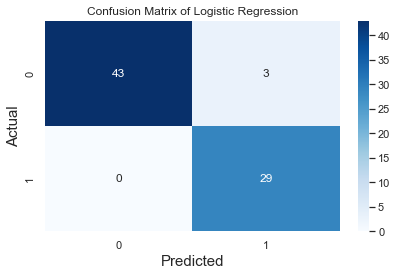

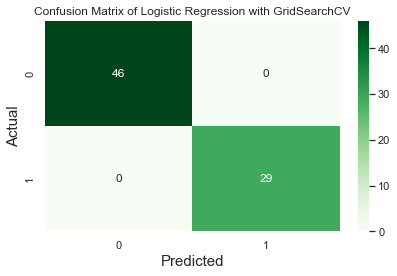

In [34]:
title = 'Confusion Matrix of Logistic Regression'
plot_confusion_matrix(ytestlr, y_predict_logreg, 'Blues', title);

# Logistic Regression with GridSearchCV
title = 'Confusion Matrix of Logistic Regression with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_logreg_gscv, 'Greens', title)

#### 5.10.2 Random Forest <a id='5.10.2_RandomForestCM'></a>

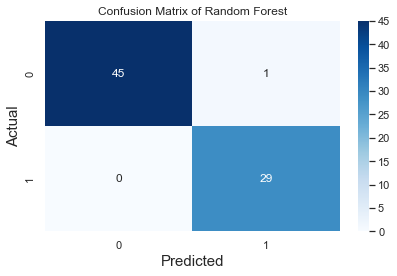

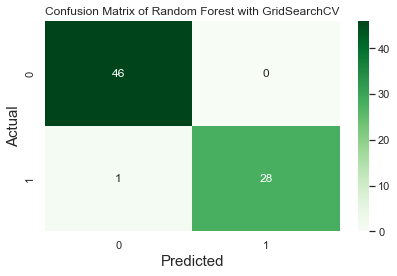

In [35]:
title = 'Confusion Matrix of Random Forest'
plot_confusion_matrix(ytestlr, y_predict_ranfor, 'Blues', title);

# Random Forest with hyperparameter tuning
title = 'Confusion Matrix of Random Forest with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_ranfor_gscv, 'Greens', title)


#### 5.10.3 LGBM Classifier  <a id='5.10.3_LGBMCM'></a>

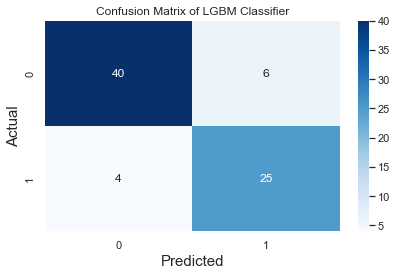

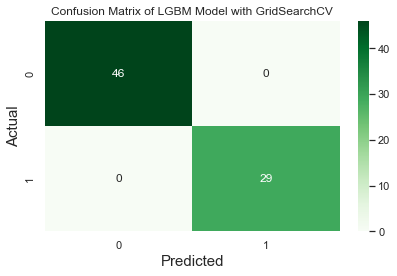

In [36]:
title = 'Confusion Matrix of LGBM Classifier'
plot_confusion_matrix(ytestlr, y_predict_LGB, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confusion Matrix of LGBM Model with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_LGB_gscv, 'Greens', title)

#### 5.10.4 XGBoost Classifier  <a id='5.10.4_xgBoostCM5'></a>

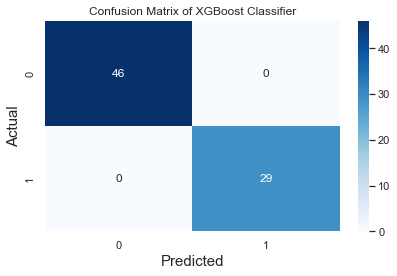

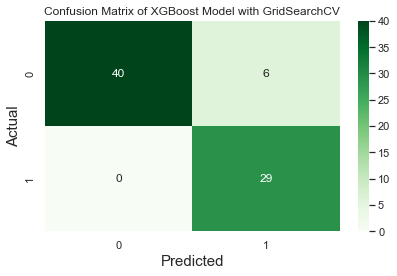

In [37]:
title = 'Confusion Matrix of XGBoost Classifier'
plot_confusion_matrix(ytestlr, y_predict_xgboost, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confusion Matrix of XGBoost Model with GridSearchCV'
plot_confusion_matrix(ytestlr, y_predict_xgboost_gscv, 'Greens', title)

#### 5.10.5 Decision Tree Classifier  <a id='5.10.5_DtreeCM'></a>

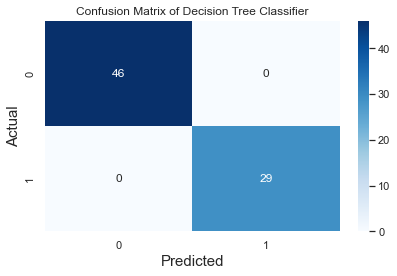

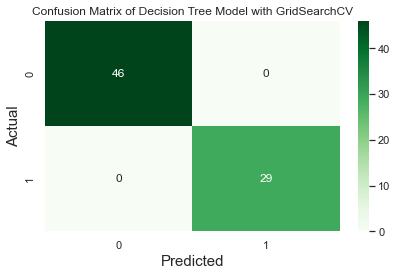

In [38]:
title = 'Confusion Matrix of Decision Tree Classifier'
plot_confusion_matrix(ytestlr, y_predict_dt, 'Blues', title);

# XGBoost Classifier with hyperparameter tuning
title = 'Confusion Matrix of Decision Tree Model with GridSearchCV'
plot_confusion_matrix(ytestlr, y_pred_dt_gscv, 'Greens', title)

### 5. 11 Model Comparison¶  <a id='5.11_ModelComoparision'></a>

                model   Default  with GridSearchCV
0  LogisticRegression  0.960000               0.96
1        RandomForest  0.960000               0.96
2                LGBM  0.866667               1.00
3       XGBClassifier  1.000000               0.92
4       Decision Tree  1.000000               1.00


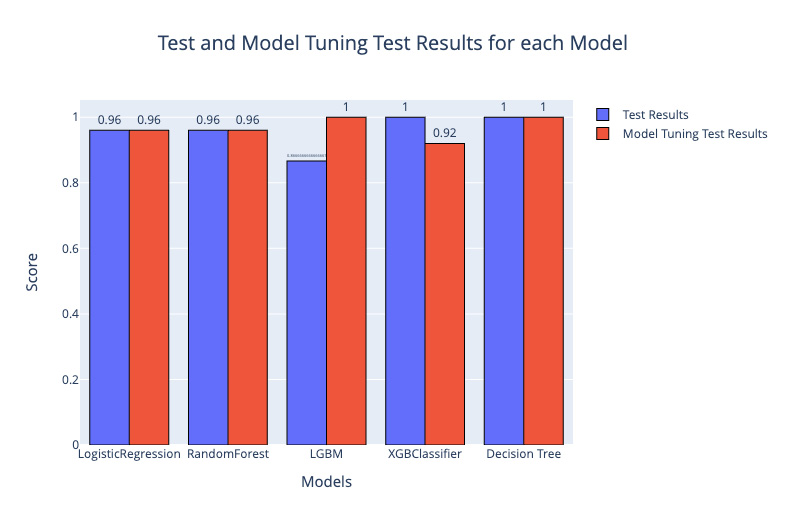

In [43]:
#Get test and model tuning test score for each model
# Make lits of test score for each model and a model name list
test_list = [logreg_accuracy, ranfor_accuracy, LGB_accuracy, xgboost_accuracy, dt_accuracy]
tuning_test_list = [logreg_gscv_accuracy, ranfor_gscv_accuracy, LGB_gscv_accuracy, xgboost_gscv_accuracy, dt_gscv_acc]
model_names = ['LogisticRegression', 'RandomForest', 'LGBM','XGBClassifier', 'Decision Tree']

# Make dataframes of each test score
test_list = pd.DataFrame(test_list)
tuning_test_list = pd.DataFrame(tuning_test_list)
model_names = pd.DataFrame(model_names)

# Name each column
test_list.columns = ['Default']
tuning_test_list.columns = ['with GridSearchCV']
model_names.columns = ['model']

# Concatenate each column
over_all_score = pd.concat([model_names, test_list, tuning_test_list], axis=1)
print(over_all_score)

    
# Plot bar chart of each test score results
fig = go.Figure(data=[go.Bar(x=over_all_score['model'], y=over_all_score['Default'], 
                             name='Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}}),
                      go.Bar(x=over_all_score['model'], y=over_all_score['with GridSearchCV'], 
                             name='Model Tuning Test Results', texttemplate='%{y:20,.4f}', 
                             textposition='outside', marker={'line': {'width': 5}})])
fig.update_layout(title_text='Test and Model Tuning Test Results for each Model',
                  title_x=0.5, title_font=dict(size=20))
fig.update_xaxes(title_text='Models', title_font={'size': 15})
fig.update_yaxes(title_text='Score', title_font={'size': 15})
fig.update_traces(marker={'line': {'color': 'Black', 'width': 1}})
fig.show()

from IPython.display import Image
img = 'newplot.jpg'
Image(url=img)
Image('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/newplot.jpg'
)

### 5.12 Summary Values  <a id='5.12_SummryValues'></a>

In [41]:
dfSummary = pd.read_csv('/Users/aquinojoeanson/Desktop/SPRINGBOARD/Capstone_Project_2/Data/HD_summary_report.csv')


In [42]:
dfSummary

,Models,Train_Accuracy,Test_Accuracy,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1-score,Test_F1-score
0,Logistic_Regression,0.995495,0.96,0.988506,0.90625,1,1,0.9955,0.960309
1,Random_Forest,1.000000,0.96,1.000000,0.90625,1,1,1.0000,0.960309
2,LGBM,0.995495,0.96,0.988506,0.90625,1,1,0.9955,0.960309
3,GBoost,0.995495,0.96,0.988506,0.90625,1,1,0.9955,0.960309
4,ecision_Tree,1.000000,1.00,1.000000,1.00000,1,1,1.0000,1.000000
